In [8]:
import cv2
from matplotlib import pyplot as plt


In [145]:
img = cv2.imread("dataset/7.jpg")

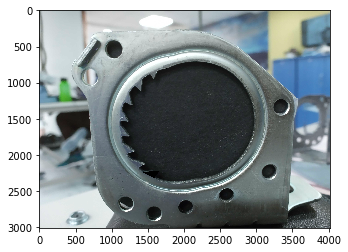

In [146]:
plt.imshow(img)

In [147]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [149]:
cv2.imwrite("test.jpg",gray)

True

In [91]:
ret, threshed = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
cnts= cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]

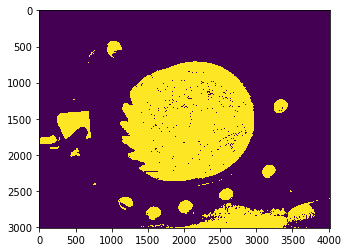

In [92]:
plt.imshow(threshed)

# Creating Dataset

In [117]:
import json
import numpy as np
import cv2
from matplotlib import pyplot as plt
import itertools
from collections import defaultdict

Drew boundaries around gear teeth and saved them using labelme

In [118]:
with open("IMG_20190529_202943.json") as f:
    result = json.loads(f.read())

In [119]:
points= []
for i in result['shapes']:
    points.append(np.array(i['points']))

In [120]:
len(points)

8

In [121]:
combination_dict = defaultdict(list)
for i in range(len(points)):
    for comb in itertools.combinations(points,i+1):
        combination_dict[i+1].append(comb)

In [122]:
combination_dict[3][0]

(array([[1643,  828],
        [1572,  969],
        [1516,  872]]), array([[1431,  937],
        [1405, 1143],
        [1316, 1040]]), array([[1237, 1143],
        [1308, 1337],
        [1175, 1284]]))

In [123]:
contours = np.array(result['shapes'][0]['points'])

In [124]:
img = cv2.imread("IMG_20190529_202943.jpg")

In [141]:
labels = []
count = 0
path = '/home/anvesh/experiments/image_processing/dataset/'
for i in combination_dict:
    for j in combination_dict[i]:
        img = cv2.imread("IMG_20190529_202943.jpg")
        cv2.fillPoly(img, pts=j, color=(0,0,0))
        cv2.imwrite(path+str(count)+'.jpg',img)
        labels.append({'image_path':path+str(count)+'.jpg','number_of_teeth':8-i})
        count+=1
        
# apply the mask
#masked_image = cv2.bitwise_(img, mask)
#temp = cv2.bitwise_not(img,masked_image)

In [131]:
import pandas as pd

In [142]:
df = pd.DataFrame(labels)

In [143]:
df

,image_path,number_of_teeth
0,/home/anvesh/experiments/image_processing/data...,7
1,/home/anvesh/experiments/image_processing/data...,7
2,/home/anvesh/experiments/image_processing/data...,7
3,/home/anvesh/experiments/image_processing/data...,7
4,/home/anvesh/experiments/image_processing/data...,7
5,/home/anvesh/experiments/image_processing/data...,7
6,/home/anvesh/experiments/image_processing/data...,7
7,/home/anvesh/experiments/image_processing/data...,7
8,/home/anvesh/experiments/image_processing/data...,6
9,/home/anvesh/experiments/image_processing/data...,6


In [135]:
df

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
/home/anvesh/experiments/image_processing/dataset/0.jpg,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/1.jpg,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/10.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/100.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/101.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/102.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/103.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/104.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/105.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/anvesh/experiments/image_processing/dataset/106.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df.to_csv("labels.csv")

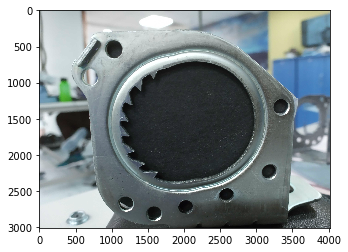

In [98]:
plt.imshow(img)